In [1]:
using Plots
using DifferentialEquations

N0 = 11
N = 1682
p1 = [0.812, 0.000012, 1, 1] 
p2 = [0.0000581, 0.21, 1, 2]
p3 = [0.51, 0.32, 0, 3]

maxdu = -10000
maxN = 0
maxt = 0

function F(du, u, p, t)
    n = u
    tt = p[3]
    if p[3] == 0
       tt = t 
    end
    du[1] = (p[1] * tt + p[2] * tt * tt * u[1]) * (N - u[1])
    if p[4] == 2
        if du[1] > maxdu 
            global maxdu = du[1]
            global maxN = u[1]
            global maxt = t
        end
    end
end

prob1 = ODEProblem(F, [N0], (0.0, 1.0), p1)
prob2 = ODEProblem(F, [N0], (0.0, 1.0), p2)
prob3 = ODEProblem(F, [N0], (0.0, 1.0), p3)

sol1 = solve(prob1, dtmax=0.01)
sol2 = solve(prob2, dtmax=0.01)
sol3 = solve(prob3, dtmax=0.01)

NN1 = [u[1] for u in sol1.u]
NN2 = [u[1] for u in sol2.u]
NN3 = [u[1] for u in sol3.u]

103-element Vector{Float64}:
   11.0
   11.000004263010634
   11.00051819665519
   11.055188923649741
   11.208317459449958
   11.47252939206289
   11.861892549643335
   12.392832594408178
   13.085254214899951
   13.96394016709035
   15.06033670408602
   16.41488392926869
   18.080120293067083
    ⋮
 1682.0
 1682.0
 1682.0
 1682.0
 1682.0
 1682.0
 1682.0
 1682.0
 1682.0
 1682.0
 1682.0
 1682.0

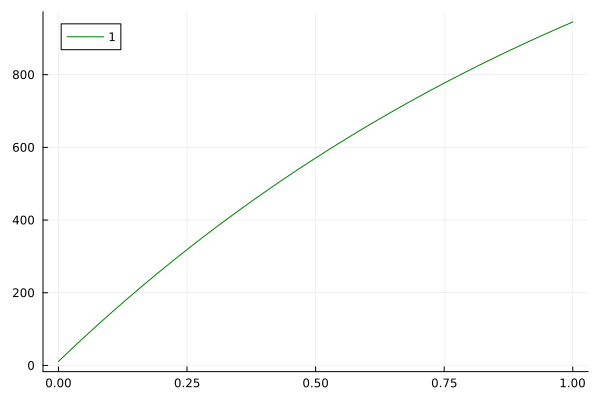

In [2]:
plt1 = plot(
  dpi=300,
  legend=true)

plot!(
  plt1,
  sol1.t,
  NN1,
  label="1",
  color=:green)

plt1

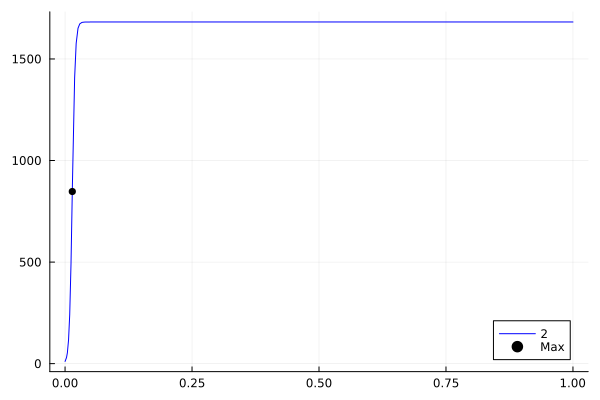

In [3]:
plt2 = plot(
  dpi=300,
  legend=true)

plot!(
  plt2,
  sol2.t,
  NN2,
  label="2",
  color=:blue)

plot!(
  plt2,
  [maxt],
  [maxN],
  seriestype = :scatter,
  label="Max",
  color=:black)

plt2

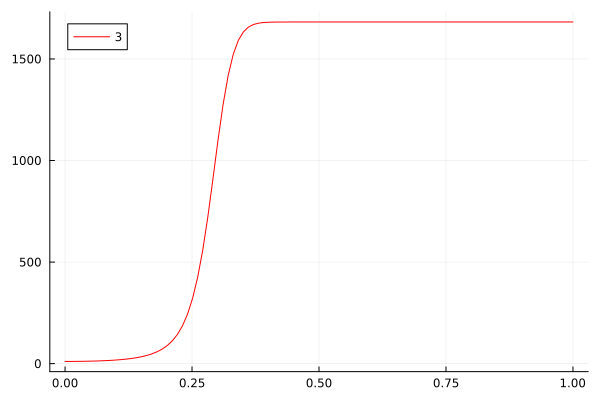

In [4]:
plt3 = plot(
  dpi=300,
  legend=true)

plot!(
  plt3,
  sol3.t,
  NN3,
  label="3",
  color=:red)

plt3